# **GradientBoosting Regression from scratch**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# create data with random numbers
np.random.seed(42)
features=np.random.rand(100,1)-0.5
target=3*features[:,0]**2 + 0.05*np.random.randn(100)

In [4]:
df=pd.DataFrame()

In [5]:
df['features']=features.reshape(100)
df['target']=target

In [6]:
df # 100 data points

features    target
0  -0.125460  0.051573
1   0.450714  0.594480
2   0.231994  0.166052
3   0.098658 -0.070178
4  -0.343981  0.343986
..       ...       ...
95 -0.006204 -0.040675
96  0.022733 -0.002305
97 -0.072459  0.032809
98 -0.474581  0.689516
99 -0.392109  0.502607

[100 rows x 2 columns]

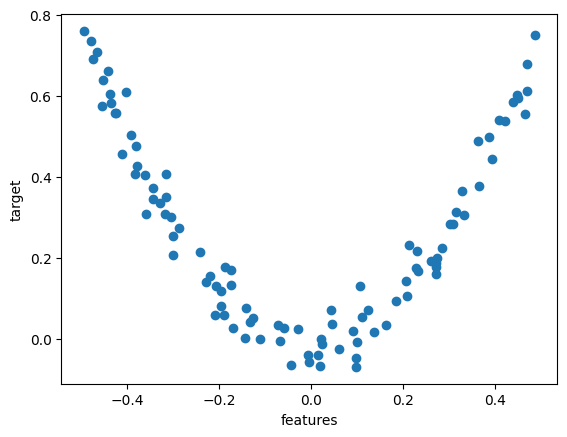

In [7]:
# plot features vs target

plt.scatter(df['features'],df['target'])
plt.xlabel('features')
plt.ylabel('target')
plt.show()

In [8]:
# model-1 gives the predictions which is the mean

df['pred1']=df['target'].mean()
df

features    target     pred1
0  -0.125460  0.051573  0.265458
1   0.450714  0.594480  0.265458
2   0.231994  0.166052  0.265458
3   0.098658 -0.070178  0.265458
4  -0.343981  0.343986  0.265458
..       ...       ...       ...
95 -0.006204 -0.040675  0.265458
96  0.022733 -0.002305  0.265458
97 -0.072459  0.032809  0.265458
98 -0.474581  0.689516  0.265458
99 -0.392109  0.502607  0.265458

[100 rows x 3 columns]

In [9]:
# calculate the pseudo residuals

df['residuals1']=df['target']-df['pred1']
df


features    target     pred1  residuals1
0  -0.125460  0.051573  0.265458   -0.213885
1   0.450714  0.594480  0.265458    0.329021
2   0.231994  0.166052  0.265458   -0.099407
3   0.098658 -0.070178  0.265458   -0.335636
4  -0.343981  0.343986  0.265458    0.078528
..       ...       ...       ...         ...
95 -0.006204 -0.040675  0.265458   -0.306133
96  0.022733 -0.002305  0.265458   -0.267763
97 -0.072459  0.032809  0.265458   -0.232650
98 -0.474581  0.689516  0.265458    0.424057
99 -0.392109  0.502607  0.265458    0.237148

[100 rows x 4 columns]

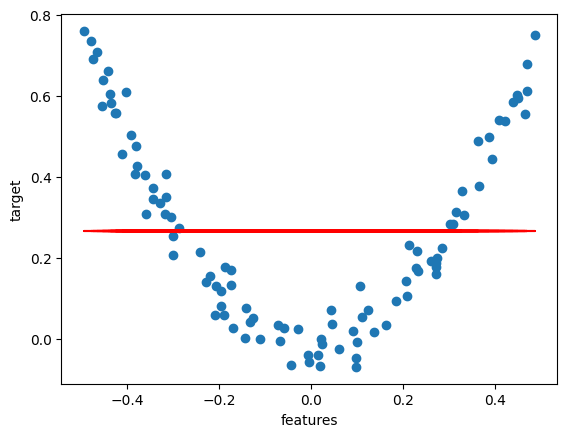

In [10]:
# plot the model-1

plt.scatter(df['features'],df['target'])
plt.plot(df['features'],df['pred1'],color='red')
plt.xlabel('features')
plt.ylabel('target')
plt.show()


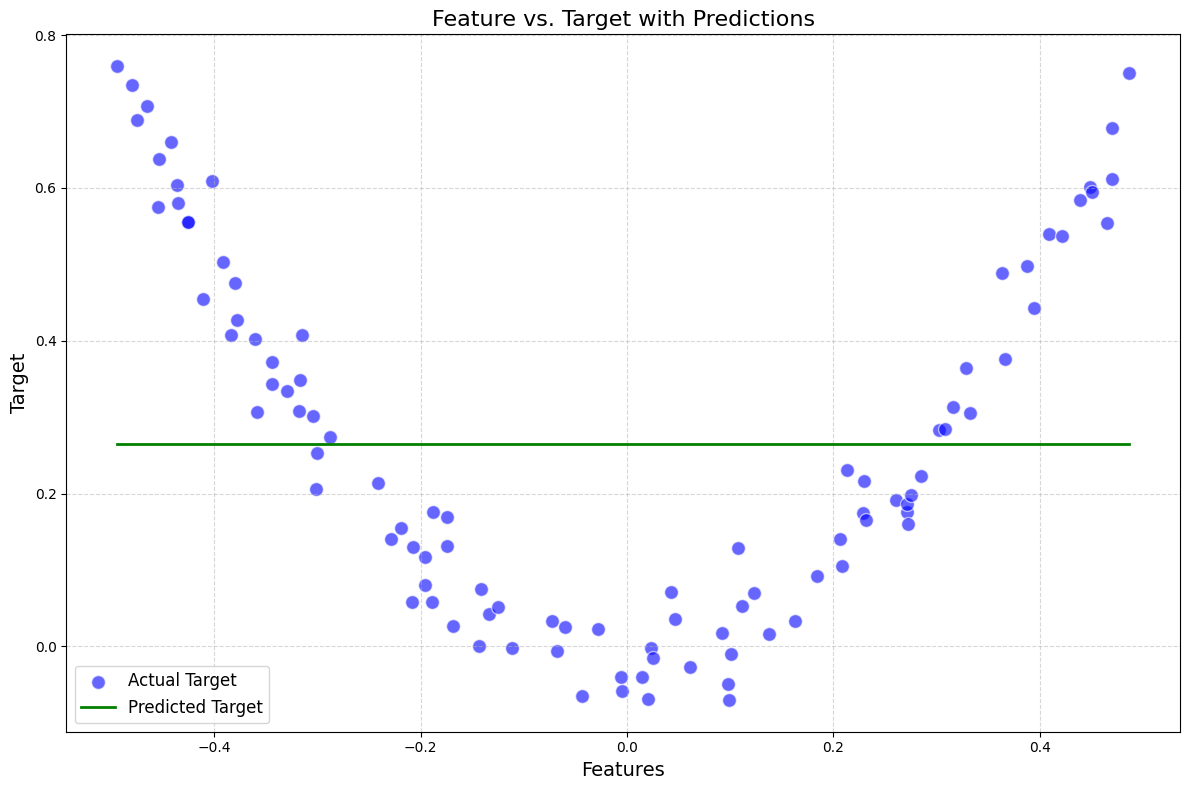

In [11]:
import matplotlib.pyplot as plt

# Optional: Sort the DataFrame by 'features' to ensure the line plot is smooth
df_sorted = df.sort_values('features')

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Scatter plot for actual target values
plt.scatter(df_sorted['features'], df_sorted['target'],
            color='blue', alpha=0.6, label='Actual Target', edgecolors='w', s=100)

# Line plot for predictions
plt.plot(df_sorted['features'], df_sorted['pred1'],
         color='green', label='Predicted Target', linewidth=2)

# Adding labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Feature vs. Target with Predictions', fontsize=16)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Enhancing the legend
plt.legend(fontsize=12, loc='best')

# Optional: Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [12]:
# make model-2 which is a  decision tree
# the target of this tree is the residual values

from sklearn.tree import DecisionTreeRegressor
tree1=DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['features'].values.reshape(100,1),df['residuals1'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

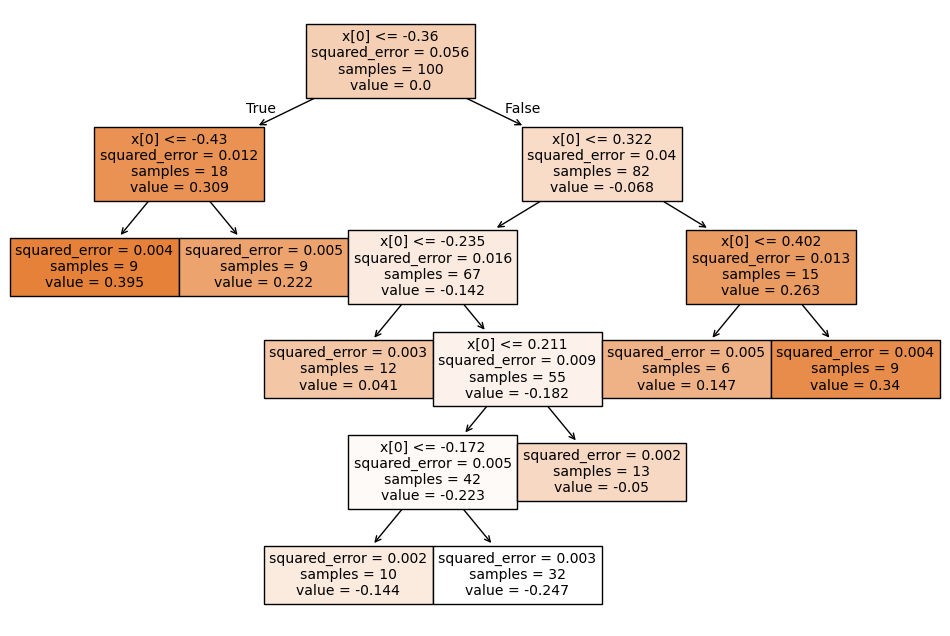

In [13]:
# plot the tree1

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree1,filled=True)
plt.show()

In [14]:
# let's test this tree1 model with random test set

# for now, let's the learning rate be 1
test_data=np.linspace(-0.5,0.5,500)
pred2=0.265458 + 1 * tree1.predict(test_data.reshape(500,1))


Text(0.5, 1.0, 'model-2 in red')

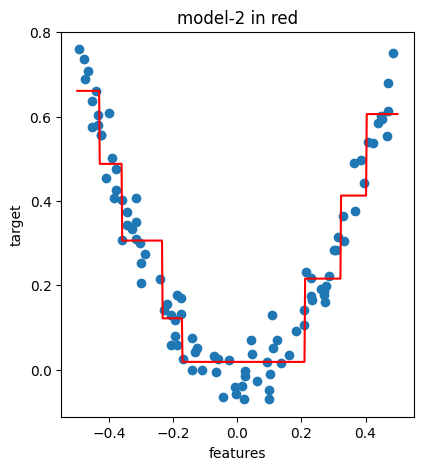

In [15]:
# lets plot the model2 prediction

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(df['features'],df['target'])
plt.plot(test_data,pred2,color='red')
plt.xlabel('features')
plt.ylabel('target')
plt.title('model-2 in red')

In [16]:
df['pred2']=0.265458 + tree1.predict(df['features'].values.reshape(100,1))

In [17]:
# let's calculate residuals 2

df['residuals2']=df['target']-df['pred2']
df

features    target     pred1  residuals1     pred2  residuals2
0  -0.125460  0.051573  0.265458   -0.213885  0.018319    0.033254
1   0.450714  0.594480  0.265458    0.329021  0.605884   -0.011404
2   0.231994  0.166052  0.265458   -0.099407  0.215784   -0.049732
3   0.098658 -0.070178  0.265458   -0.335636  0.018319   -0.088497
4  -0.343981  0.343986  0.265458    0.078528  0.305964    0.038022
..       ...       ...       ...         ...       ...         ...
95 -0.006204 -0.040675  0.265458   -0.306133  0.018319   -0.058994
96  0.022733 -0.002305  0.265458   -0.267763  0.018319   -0.020624
97 -0.072459  0.032809  0.265458   -0.232650  0.018319    0.014489
98 -0.474581  0.689516  0.265458    0.424057  0.660912    0.028604
99 -0.392109  0.502607  0.265458    0.237148  0.487796    0.014810

[100 rows x 6 columns]

In [18]:
# let's make model-3 with  residuals 2 as target

tree2=DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['features'].values.reshape(100,1),df['residuals2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [19]:
pred3=0.265458 + 1 * tree1.predict(test_data.reshape(-1,1)) + 1 * tree2.predict(test_data.reshape(-1,1))

Text(0.5, 1.0, 'model-3 in green')

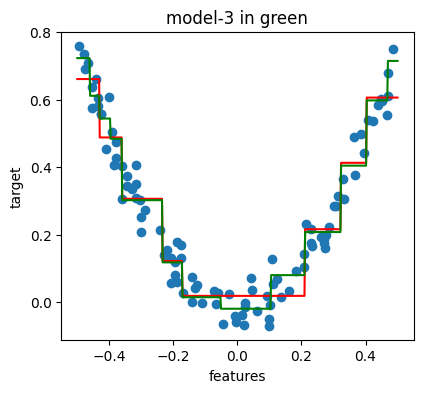

In [20]:
# plot this model-3

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df['features'],df['target'])
plt.plot(test_data,pred2,color='red')
plt.plot(test_data,pred3,color='green')
plt.xlabel('features')
plt.ylabel('target')
plt.title('model-3 in green')


In [21]:
# here , we have used 3 models.
# but this can be done  directly by importing  GradientBoostingRegressor


np.random.seed(42)
features=np.random.rand(100,1)-0.5
target=3*features[:,0]**2 + 0.05*np.random.randn(100)
df=pd.DataFrame()
df['features']=features.reshape(100)
df['target']=target


from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=3,n_estimators=50,learning_rate=0.1)
gbrt.fit(df['features'].values.reshape(100,1),df['target'].values)

GradientBoostingRegressor(n_estimators=50)

In [22]:
# let's test this model
test_data=np.linspace(-0.5,0.5,500)
gbrt_pred=gbrt.predict(test_data.reshape(500,1))


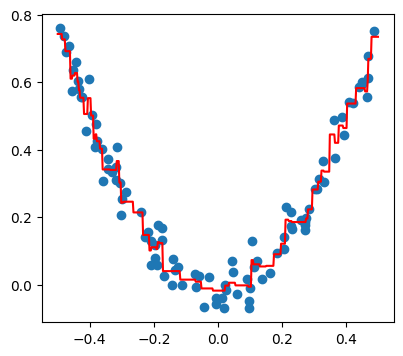

In [23]:
# let's plot this

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df['features'],df['target'])
plt.plot(test_data,gbrt_pred,color='red')


In [28]:
from sklearn.metrics import mean_squared_error

# if you want to see how well the model fits training data, you could do:
mse = mean_squared_error(df['features'], gbrt.predict(df['features'].values.reshape(-1, 1)))

In [29]:
mse

0.24528015377375742

# **GradientBoosting Regression from sklearn**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.datasets import load_iris, fetch_california_housing

In [37]:
data_clf=load_iris()
df=pd.DataFrame(data_clf.data,columns=data_clf.feature_names)
df['target']=data_clf.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [39]:
df.shape

(150, 5)

In [38]:
features=df.drop('target',axis=1)
target=df['target']

In [41]:
# split into training and testing
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=20,learning_rate=0.01)
model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=20)

In [49]:
target_pred=model.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,target_pred)
print(accuracy) # overfitted due to less data etc

# but this is the procedure
# we can also do the hyperparameter tuning


1.0


# **GradientBoosting Regression from sklearn**

In [54]:
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [55]:
features=df.drop('target',axis=1)
target=df['target']

In [56]:
df.shape

(20640, 9)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)


In [71]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [72]:
target_pred=model.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse=mean_squared_error(y_test,target_pred)
r2=r2_score(y_test,target_pred)
mae=mean_absolute_error(y_test,target_pred)

print(f'mse: {mse}\nr2: {r2}\nmae: {mae}')

mse: 0.29407876957513357
r2: 0.7755824521517651
mae: 0.37171553690875236
